In [2]:
import cv2
import numpy as np
from PIL import Image

In [3]:
i=cv2.imread("frame_23351_l.png")

In [8]:
i.shape


(273, 412, 3)

In [12]:
cv2.imshow("image",i)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

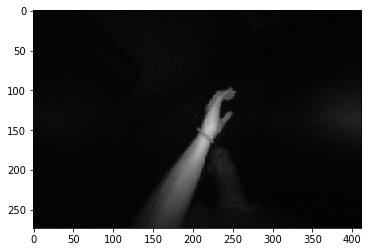

In [14]:
imgplot = plt.imshow(i)

In [16]:
i=i[85:,110:280,:]

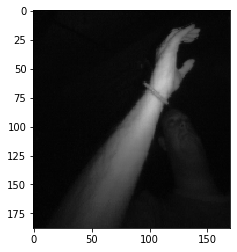

In [17]:
imgplot=plt.imshow(i)

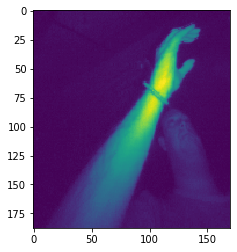

In [20]:
rgb_weights=[0.2989, 0.5870, 0.1140]
grayscale_img=np.dot(i[...,:3],rgb_weights)
imgplot=plt.imshow(grayscale_img)

In [45]:
cv2.imwrite("face-" + ".jpg", grayscale_img)

True

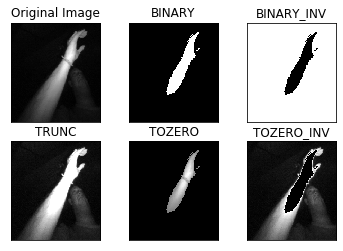

In [31]:
gi=grayscale_img
ret,thresh1 = cv2.threshold(gi,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gi,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gi,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gi,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gi,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gi, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("face-.png",0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
ret,th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

error: OpenCV(4.2.0) C:/projects/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:221: error: (-215:Assertion failed) src && dst && count > 0 in function 'cv::opt_AVX2::FilterEngine__proceed'
